In [1]:
from sklearn.linear_model import LinearRegression
# StandardScaler is used to normalized the data (Scaling of the data)
# PolynomialFeatures is used to find out all the possible model for the learning algorithem
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# train test split is used to divide the data into training and test set.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')

In [3]:
x_train = data[:,0]
y_train = data[:,1]

In [4]:
x_train = x_train.reshape(50,1)
y_train = y_train.reshape(50,1)


In [5]:
print(f'Dim of X:{x_train.ndim}')
print(f'Dim of y:{y_train.ndim}')

Dim of X:2
Dim of y:2


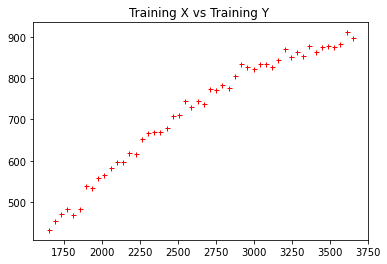

In [6]:
plt.plot(x_train,y_train, '+', markersize = 5, color = 'red')
plt.title("Training X vs Training Y ")
plt.show()

In [7]:
x_train, X_, y_train, y_ = train_test_split(x_train,y_train,test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1 )

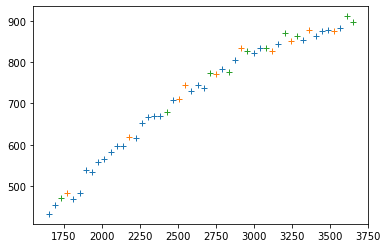

In [8]:
plt.plot(x_train,y_train, '+',x_cv,y_cv,'+',x_test,y_test,'+')
plt.show()

In [9]:
# Feature Scaling
scalar_linear = StandardScaler()
x_train_scaled = scalar_linear.fit_transform(x_train)

In [10]:
# trained the model
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [11]:
# Evaluating the model, calculate the mean squared error of the test set and cross validation set

yhat = model.predict(x_train_scaled)
print(f'The mean squared value of the test set : {mean_squared_error(y_train,yhat)/2}')


The mean squared value of the test set : 406.19374192533127


In [12]:
# Now we need to check the Corss validation. we need to scale th cross validation x set by calling StandardScalar just 
# tranform function
x_cs_scaled = scalar_linear.transform(x_cv)
yhat_cs = model.predict(x_cs_scaled)
print(f'Mean squared value of cross validation : {mean_squared_error(y_cv,yhat_cs)/2}')

Mean squared value of cross validation : 551.7789026952216


# Adding New features

In [16]:
ploy  = PolynomialFeatures(degree=2, include_bias=False)
# compute the number of features
x_train_ploy = ploy.fit_transform(x_train)
# Scaling
scaling_ploy = StandardScaler()
x_scaled_poly = scaling_ploy.fit_transform(x_train_ploy)
# Creatng another model
ploy_model = LinearRegression()
ploy_model.fit(x_scaled_poly,y_train)
# MSV meauring
yhat_ploy = ploy_model.predict(x_scaled_poly)
print(f'MSV of Degree2 :{mean_squared_error(y_train,yhat_ploy)}')

MSV of Degree2 :98.22321866805031


In [17]:
# Now cv data
# frist adding features
x_cv_ploy = ploy.transform(x_cv)
# Scaling
scaled_x_cv = scaling_ploy.transform(x_cv_ploy)
# Model Creating
# cv_poly = LinearRegression()
# cv_poly.fit(scaled_x_cv, y_cv)
# Predicting
yhat_poly_cv = ploy_model.predict(scaled_x_cv)
print(f'MSV of Degree2 cv data :{mean_squared_error(y_cv,yhat_poly_cv)}')


MSV of Degree2 cv data :175.39682422223822


In [27]:
msv_xtrian = []
msv_cvtrain = []
scalars = []
models = []
for degree in range(1,11):
    print(degree)
    # Add New Feature
    poly = PolynomialFeatures(degree, include_bias=False)
    poly_x_train = poly.fit_transform(x_train)
    
    # Scaling x_trian
    scale = StandardScaler()
    scaled_x_train = scale.fit_transform(poly_x_train)
    scalars.append(scale)
    # Model intiate and apply fit
    model = LinearRegression()
    model.fit(scaled_x_train, y_train) 
    models.append(model)
    # Feed the Model
    yhat = model.predict(scaled_x_train)
    
    # Find yhat and msv
    mean_x_train = mean_squared_error(y_train, yhat)/2
    msv_xtrian.append(mean_x_train)
    
    # Add new feature for Cross validation
    poly = PolynomialFeatures(degree, include_bias=False)
    poly_cv_train = poly.fit_transform(x_cv)
    
    # Scaling the data via privoius data
    scaled_cv_train = scale.fit_transform(poly_cv_train)
    
    # feed it to the xtrain model 
    yhat = model.predict(scaled_cv_train)
    # cal msv
    mean_cv_train = mean_squared_error(y_cv, yhat) / 2
    msv_cvtrain.append(mean_cv_train)
    
print(f'MSV_value {msv_xtrian}')
print(f'MSV_value {msv_cvtrain}')

1
2
3
4
5
6
7
8
9
10
MSV_value [406.19374192533127, 49.111609334025154, 47.61632235298251, 47.14646644263599, 47.142574526300784, 41.38387792556905, 39.249610627753945, 38.98136379635805, 37.97170881951426, 37.036468980280645]
MSV_value [3696.781174313862, 3287.497520172002, 3286.52319800959, 3287.736330552725, 3288.609270392849, 3281.7519540444837, 3577.2627313658836, 3860.452099145508, 27311.638265846996, 303306.9368156289]


In [28]:
degree = np.argmin(msv_cvtrain) + 1
print(f'the lowest degree is {degree}')

the lowest degree is 6


In [31]:
# Adding Features
poly = PolynomialFeatures(degree, include_bias=False)
poly_xtest = poly.fit_transform(x_test)

# Scaling
scaled_xtest = scalars[degree -1].transform(poly_xtest)

# Model
yhat = models[degree - 1].predict(scaled_xtest) 
test_msv = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {msv_xtrian[degree-1]:.2f}")
print(f"Cross Validation MSE: {msv_cvtrain[degree-1]:.2f}")
print(f"Test MSE: {test_msv:.2f}")

Training MSE: 41.38
Cross Validation MSE: 3281.75
Test MSE: 2946.08
